In [91]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [92]:
import os
os.getcwdb()

b'C:\\Users\\HP'

In [93]:
import os
print(os.listdir("C:\\Users\\HP\\input"))

['desktop.ini', 'test.csv', 'train.csv', 'twittertest.csv', 'twittertrain.csv']


In [98]:
train_df = pd.read_csv("train.csv",encoding='latin-1')
test_df = pd.read_csv("test.csv",encoding='latin-1')

In [99]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
ItemID           99989 non-null int64
Sentiment        99989 non-null int64
SentimentText    99989 non-null object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [100]:
train_df.head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [101]:
test_df.head()
print('Testing data set has no sentiment column')
print(test_df.head(10))

Testing data set has no sentiment column
   ItemID                                      SentimentText
0       1                       is so sad for my APL frie...
1       2                     I missed the New Moon trail...
2       3                            omg its already 7:30 :O
3       4            .. Omgaga. Im sooo  im gunna CRy. I'...
4       5           i think mi bf is cheating on me!!!   ...
5       6                  or i just worry too much?        
6       7                 Juuuuuuuuuuuuuuuuussssst Chillin!!
7       8         Sunny Again        Work Tomorrow  :-|  ...
8       9        handed in my uniform today . i miss you ...
9      10           hmmmm.... i wonder how she my number @-)


#We can see in above tweet column in both data sets Training & Testing tweets are unstructured, for better analysis we first need to structure the tweets, remove the unwanted words, replace the misspelled words with the correct ones, replace the abriviation with full words



In [102]:
# Merging both the data sets as tweets in both the data set is unstructured
combine_df = train_df.append(test_df, ignore_index = True, sort = False)
combine_df.head()


,ItemID,Sentiment,SentimentText
0,1,0.0,is so sad for my APL frie...
1,2,0.0,I missed the New Moon trail...
2,3,1.0,omg its already 7:30 :O
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0.0,i think mi bf is cheating on me!!! ...


In [104]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399978 entries, 0 to 399977
Data columns (total 3 columns):
ItemID           399978 non-null int64
Sentiment        99989 non-null float64
SentimentText    399978 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 9.2+ MB


Data processing & cleaning
Step A : Converting html entities
Step B : Changing all the tweets into lowercase
Step C : Apostrophe Lookup
Step D : Short Word Lookup
Step E : Emoticon Lookup
Step F : Replacing Special Characters with space
Step G : Replacing Numbers (integers) with space
Step H : Removing words whom length is 1

In [105]:
# Importing HTMLParser
from html.parser import HTMLParser
html_parser = HTMLParser()

In [107]:
combine_df['clean_tweet'] = combine_df['SentimentText'].apply(lambda x: html_parser.unescape(x))
combine_df.head(10)

,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0.0,is so sad for my APL frie...,is so sad for my APL frie...
1,2,0.0,I missed the New Moon trail...,I missed the New Moon trail...
2,3,1.0,omg its already 7:30 :O,omg its already 7:30 :O
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0.0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...
5,6,0.0,or i just worry too much?,or i just worry too much?
6,7,1.0,Juuuuuuuuuuuuuuuuussssst Chillin!!,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0.0,Sunny Again Work Tomorrow :-| ...,Sunny Again Work Tomorrow :-| ...
8,9,1.0,handed in my uniform today . i miss you ...,handed in my uniform today . i miss you ...
9,10,1.0,hmmmm.... i wonder how she my number @-),hmmmm.... i wonder how she my number @-)


In [108]:
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: x.lower())
combine_df.head(10)

,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0.0,is so sad for my APL frie...,is so sad for my apl frie...
1,2,0.0,I missed the New Moon trail...,i missed the new moon trail...
2,3,1.0,omg its already 7:30 :O,omg its already 7:30 :o
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,.. omgaga. im sooo im gunna cry. i'...
4,5,0.0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...
5,6,0.0,or i just worry too much?,or i just worry too much?
6,7,1.0,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin!!
7,8,0.0,Sunny Again Work Tomorrow :-| ...,sunny again work tomorrow :-| ...
8,9,1.0,handed in my uniform today . i miss you ...,handed in my uniform today . i miss you ...
9,10,1.0,hmmmm.... i wonder how she my number @-),hmmmm.... i wonder how she my number @-)


In [40]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [109]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text


In [110]:
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
combine_df.head(10)

,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0.0,is so sad for my APL frie...,is so sad for my apl frie...
1,2,0.0,I missed the New Moon trail...,i missed the new moon trail...
2,3,1.0,omg its already 7:30 :O,omg its already 7:30 :o
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,.. omgaga. im sooo im gunna cry. I ...
4,5,0.0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...
5,6,0.0,or i just worry too much?,or i just worry too much?
6,7,1.0,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin!!
7,8,0.0,Sunny Again Work Tomorrow :-| ...,sunny again work tomorrow :-| ...
8,9,1.0,handed in my uniform today . i miss you ...,handed in my uniform today . i miss you ...
9,10,1.0,hmmmm.... i wonder how she my number @-),hmmmm.... i wonder how she my number @-)


In [43]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [111]:
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
combine_df.head(10)

,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0.0,is so sad for my APL frie...,is so sad for my apl frie...
1,2,0.0,I missed the New Moon trail...,i missed the new moon trail...
2,3,1.0,omg its already 7:30 :O,oh my god its already 7:30 :o
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,.. omgaga. im sooo im gunna cry. I ...
4,5,0.0,i think mi bf is cheating on me!!! ...,i think mi boyfriend is cheating on m...
5,6,0.0,or i just worry too much?,or i just worry too much?
6,7,1.0,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin!!
7,8,0.0,Sunny Again Work Tomorrow :-| ...,sunny again work tomorrow :-| ...
8,9,1.0,handed in my uniform today . i miss you ...,handed in my uniform today . i miss you ...
9,10,1.0,hmmmm.... i wonder how she my number @-),hmmmm.... i wonder how she my number @-)


In [116]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-|": "sad"
}

In [66]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [117]:
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
combine_df.head(10)

,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0.0,is so sad for my APL frie...,is so sad for my apl frie...
1,2,0.0,I missed the New Moon trail...,i missed the new moon trail...
2,3,1.0,omg its already 7:30 :O,oh my god its already 7:30 happy
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,.. omgaga. im sooo im gunna cry. I ...
4,5,0.0,i think mi bf is cheating on me!!! ...,i think mi boyfriend is cheating on m...
5,6,0.0,or i just worry too much?,or i just worry too much?
6,7,1.0,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin!!
7,8,0.0,Sunny Again Work Tomorrow :-| ...,sunny again work tomorrow sad ...
8,9,1.0,handed in my uniform today . i miss you ...,handed in my uniform today . i miss you ...
9,10,1.0,hmmmm.... i wonder how she my number @-),hmmmm.... i wonder how she my number @-)


In [118]:
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
combine_df.head(10)

,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0.0,is so sad for my APL frie...,is so sad for my apl frie...
1,2,0.0,I missed the New Moon trail...,i missed the new moon trail...
2,3,1.0,omg its already 7:30 :O,oh my god its already 7 30 happy
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry I ...
4,5,0.0,i think mi bf is cheating on me!!! ...,i think mi boyfriend is cheating on m...
5,6,0.0,or i just worry too much?,or i just worry too much
6,7,1.0,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin
7,8,0.0,Sunny Again Work Tomorrow :-| ...,sunny again work tomorrow sad ...
8,9,1.0,handed in my uniform today . i miss you ...,handed in my uniform today i miss you ...
9,10,1.0,hmmmm.... i wonder how she my number @-),hmmmm i wonder how she my number


In [119]:
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
combine_df.head(10)

,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0.0,is so sad for my APL frie...,is so sad for my apl frie...
1,2,0.0,I missed the New Moon trail...,i missed the new moon trail...
2,3,1.0,omg its already 7:30 :O,oh my god its already 7 30 happy
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry I ...
4,5,0.0,i think mi bf is cheating on me!!! ...,i think mi boyfriend is cheating on m...
5,6,0.0,or i just worry too much?,or i just worry too much
6,7,1.0,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin
7,8,0.0,Sunny Again Work Tomorrow :-| ...,sunny again work tomorrow sad ...
8,9,1.0,handed in my uniform today . i miss you ...,handed in my uniform today i miss you ...
9,10,1.0,hmmmm.... i wonder how she my number @-),hmmmm i wonder how she my number


In [120]:
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
combine_df.head(10)

,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0.0,is so sad for my APL frie...,is so sad for my apl frie...
1,2,0.0,I missed the New Moon trail...,i missed the new moon trail...
2,3,1.0,omg its already 7:30 :O,oh my god its already happy
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry I ...
4,5,0.0,i think mi bf is cheating on me!!! ...,i think mi boyfriend is cheating on m...
5,6,0.0,or i just worry too much?,or i just worry too much
6,7,1.0,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin
7,8,0.0,Sunny Again Work Tomorrow :-| ...,sunny again work tomorrow sad ...
8,9,1.0,handed in my uniform today . i miss you ...,handed in my uniform today i miss you ...
9,10,1.0,hmmmm.... i wonder how she my number @-),hmmmm i wonder how she my number


In [121]:
combine_df['clean_tweet'] = combine_df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
combine_df['clean_tweet'][0:5]

0                          is so sad for my apl friend
1                          missed the new moon trailer
2                          oh my god its already happy
3    omgaga im sooo im gunna cry have been at this ...
4                 think mi boyfriend is cheating on me
Name: clean_tweet, dtype: object

In [122]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [123]:
combine_df['tweet_token'] = combine_df['clean_tweet'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
combine_df.head(10)

,ItemID,Sentiment,SentimentText,clean_tweet,tweet_token
0,1,0.0,is so sad for my APL frie...,is so sad for my apl friend,"[is, so, sad, for, my, apl, friend]"
1,2,0.0,I missed the New Moon trail...,missed the new moon trailer,"[missed, the, new, moon, trailer]"
2,3,1.0,omg its already 7:30 :O,oh my god its already happy,"[oh, my, god, its, already, happy]"
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry have been at this ...,"[omgaga, im, sooo, im, gunna, cry, have, been,..."
4,5,0.0,i think mi bf is cheating on me!!! ...,think mi boyfriend is cheating on me,"[think, mi, boyfriend, is, cheating, on, me]"
5,6,0.0,or i just worry too much?,or just worry too much,"[or, just, worry, too, much]"
6,7,1.0,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin,"[juuuuuuuuuuuuuuuuussssst, chillin]"
7,8,0.0,Sunny Again Work Tomorrow :-| ...,sunny again work tomorrow sad tv tonight,"[sunny, again, work, tomorrow, sad, tv, tonight]"
8,9,1.0,handed in my uniform today . i miss you ...,handed in my uniform today miss you already,"[handed, in, my, uniform, today, miss, you, al..."
9,10,1.0,hmmmm.... i wonder how she my number @-),hmmmm wonder how she my number,"[hmmmm, wonder, how, she, my, number]"


In [59]:
# Importing stop words from NLTK corpus for english language
stop_words = set(stopwords.words('english'))

In [124]:
combine_df['tweet_token_filtered'] = combine_df['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
combine_df[['tweet_token', 'tweet_token_filtered']].head(10)

,tweet_token,tweet_token_filtered
0,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]"
1,"[missed, the, new, moon, trailer]","[missed, new, moon, trailer]"
2,"[oh, my, god, its, already, happy]","[oh, god, already, happy]"
3,"[omgaga, im, sooo, im, gunna, cry, have, been,...","[omgaga, im, sooo, im, gunna, cry, dentist, si..."
4,"[think, mi, boyfriend, is, cheating, on, me]","[think, mi, boyfriend, cheating]"
5,"[or, just, worry, too, much]","[worry, much]"
6,"[juuuuuuuuuuuuuuuuussssst, chillin]","[juuuuuuuuuuuuuuuuussssst, chillin]"
7,"[sunny, again, work, tomorrow, sad, tv, tonight]","[sunny, work, tomorrow, sad, tv, tonight]"
8,"[handed, in, my, uniform, today, miss, you, al...","[handed, uniform, today, miss, already]"
9,"[hmmmm, wonder, how, she, my, number]","[hmmmm, wonder, number]"


In [125]:
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()
# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
combine_df['tweet_lemmatized'] = combine_df['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
combine_df['tweet_lemmatized'].head(10)

0                                       sad apl friend
1                              missed new moon trailer
2                                 oh god already happy
3    omgaga im sooo im gunna cry dentist since supo...
4                          think mi boyfriend cheating
5                                           worry much
6                     juuuuuuuuuuuuuuuuussssst chillin
7                   sunny work tomorrow sad tv tonight
8                    handed uniform today miss already
9                                  hmmmm wonder number
Name: tweet_lemmatized, dtype: object

In [126]:
combine_df.head()

,ItemID,Sentiment,SentimentText,clean_tweet,tweet_token,tweet_token_filtered,tweet_lemmatized
0,1,0.0,is so sad for my APL frie...,is so sad for my apl friend,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]",sad apl friend
1,2,0.0,I missed the New Moon trail...,missed the new moon trailer,"[missed, the, new, moon, trailer]","[missed, new, moon, trailer]",missed new moon trailer
2,3,1.0,omg its already 7:30 :O,oh my god its already happy,"[oh, my, god, its, already, happy]","[oh, god, already, happy]",oh god already happy
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry have been at this ...,"[omgaga, im, sooo, im, gunna, cry, have, been,...","[omgaga, im, sooo, im, gunna, cry, dentist, si...",omgaga im sooo im gunna cry dentist since supo...
4,5,0.0,i think mi bf is cheating on me!!! ...,think mi boyfriend is cheating on me,"[think, mi, boyfriend, is, cheating, on, me]","[think, mi, boyfriend, cheating]",think mi boyfriend cheating


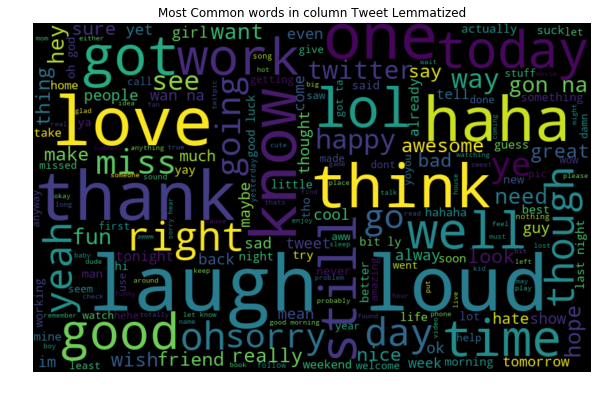

In [127]:
#Visualizing all the words in column "tweet_lemmatized" in our data using the wordcloud plot.
from wordcloud import WordCloud
all_words = ' '.join([text for text in combine_df['tweet_lemmatized']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

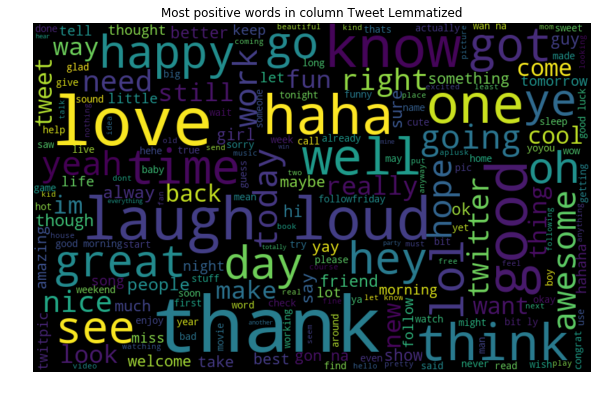

In [131]:
#Visualizing all the normal or non racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
normal_words =' '.join([text for text in combine_df['tweet_lemmatized'][combine_df['Sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most positive words in column Tweet Lemmatized")
plt.show()

In [ ]:
#Visualizing all the  racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
normal_words =' '.join([text for text in combine_df['tweet_lemmatized'][combine_df['Sentiment'] ==0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most negative words in column Tweet Lemmatized")
plt.show()

In [133]:
# Importing library
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=1000, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [134]:
bow_lemm = bow_vectorizer.fit_transform(combine_df['tweet_lemmatized'])
bow_lemm

<399978x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 1547135 stored elements in Compressed Sparse Row format>

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=1000, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [136]:
tfidf_lemm = tfidf_vectorizer.fit_transform(combine_df['tweet_lemmatized'])
tfidf_lemm

<399978x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1547135 stored elements in Compressed Sparse Row format>

In [146]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [148]:
train_bow = bow_lemm[:99989,:]
test_bow = bow_lemm[99989:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_df['Sentiment'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

A2 = f1_score(yvalid, prediction_int) # calculating f1 score
print(A2)

0.7686310590286185
